<a href="https://colab.research.google.com/github/fjadidi2001/DataScienceJourney/blob/master/DANES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install selenium
!pip install facebook-scraper

!pip install lxml_html_clean


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 80.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.9/492.9 kB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.5/131.5 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.7/295.7 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.8/125.8 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.4/107.4 kB 7.9 MB/s eta 0:00:00
  Created wheel for demjson3: filename=demjson3-3.0.6-py3-none-any.whl size=75281 sha256=33c9c2145cc588146911d118eef4696ae774ce55f735a8e4a00b4a22948357d9
  Stor

# 1. Distribution of Post Ratings


In [2]:
import pandas as pd

df = pd.read_csv('facebook-fact-check.csv')
rating_distribution = df['Rating'].value_counts()
print(rating_distribution)

Rating
mostly true                  1669
no factual content            264
mixture of true and false     245
mostly false                  104
Name: count, dtype: int64


# 2. Engagement by Category (Mainstream vs. Left vs. Right)


In [3]:
engagement = df.groupby('Category')[['share_count', 'reaction_count', 'comment_count']].mean()
print(engagement)

             share_count  reaction_count  comment_count
Category                                               
left        18025.276644    21744.893617    1623.263830
mainstream    160.656810      694.371179     207.221834
right        1249.911450     1827.690226     265.428571


# 3. Post Types and Their Ratings


In [4]:
post_type_rating = pd.crosstab(df['Post Type'], df['Rating'])
print(post_type_rating)

Rating     mixture of true and false  mostly false  mostly true  \
Post Type                                                         
link                             229            95         1385   
photo                              6             9           63   
text                               1             0            3   
video                              9             0          218   

Rating     no factual content  
Post Type                      
link                       71  
photo                     129  
text                        0  
video                      64  


# 4. Temporal Analysis (Posts Over Time)


In [5]:
df['Date Published'] = pd.to_datetime(df['Date Published'])
daily_posts = df['Date Published'].dt.date.value_counts().sort_index()
print(daily_posts)

Date Published
2016-09-19    306
2016-09-20    317
2016-09-21    306
2016-09-22    293
2016-09-23    294
2016-09-26    403
2016-09-27    363
Name: count, dtype: int64


# 5. Handling Missing Data


In [6]:
# Fill missing engagement values with 0
df[['share_count', 'reaction_count', 'comment_count']] = df[
    ['share_count', 'reaction_count', 'comment_count']
].fillna(0)

# Visualization

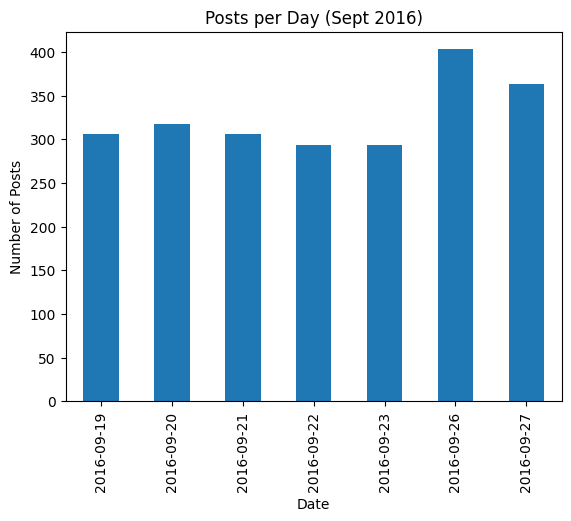

In [7]:
import matplotlib.pyplot as plt

# Plot daily posts
daily_posts.plot(kind='bar', title='Posts per Day (Sept 2016)')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.show()

In [8]:
!pip install requests beautifulsoup4

In [10]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Load your dataset
df = pd.read_csv('facebook-fact-check.csv')

# Function to extract post content from URL
def get_post_content(url):
    try:
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
        }
        response = requests.get(url, headers=headers, timeout=10)
        soup = BeautifulSoup(response.text, 'html.parser')

        # Facebook post content is typically in a <div> with specific classes
        content_div = soup.find('div', {'class': 'x1iorvi4 x1pi30zi x1l90r2v x1swvt13'})  # Update class based on Facebook's current structure
        return content_div.get_text(strip=True) if content_div else "Content not found"
    except Exception as e:
        return f"Error: {str(e)}"

# Apply the function to your DataFrame
df['post_content'] = df['Post URL'].apply(get_post_content)

# Display results
print(df[['Post URL', 'post_content']].head())

KeyboardInterrupt: 

To retrieve the **content of Facebook posts** using the **Facebook Graph API**, follow these steps. This method is more reliable than web scraping and complies with Facebook’s terms of service.

---

### **Step 1: Set Up Facebook Developer Access**
1. Go to the [Facebook Developers Portal](https://developers.facebook.com/).
2. Create a new app (e.g., "PostContentExtractor").
3. Generate an **access token**:
   - Navigate to **Tools → Graph API Explorer**.
   - Under "User or Page," select your app and generate a token with the `pages_read_engagement` permission.
   - Save your token (e.g., `EAAN...`).

---

### **Step 2: Use the Facebook Graph API in Colab**
Here’s how to fetch post content using Python and the Facebook API:

```python
import pandas as pd
import requests

# Load your dataset
df = pd.read_csv('facebook-fact-check.csv')

# Replace with your access token
ACCESS_TOKEN = 'YOUR_ACCESS_TOKEN'

def get_facebook_post_content(account_id, post_id):
    url = f'https://graph.facebook.com/v19.0/{account_id}_{post_id}'
    params = {
        'fields': 'message',
        'access_token': ACCESS_TOKEN
    }
    try:
        response = requests.get(url, params=params)
        data = response.json()
        return data.get('message', 'No text content available')
    except Exception as e:
        return f"API Error: {str(e)}"

# Apply to DataFrame
df['post_content'] = df.apply(
    lambda row: get_facebook_post_content(row['account_id'], row['post_id']),
    axis=1
)

# Save results
df.to_csv('facebook-posts-with-content.csv', index=False)

# Preview
print(df[['post_id', 'post_content']].head())
```

---

### **Key Notes**
1. **Token Permissions**:
   - Ensure your token has the `pages_read_engagement` or `pages_manage_posts` permission.
   - Tokens expire! Use a **long-lived token** for extended use.

2. **Handling Errors**:
   - If a post has no text (e.g., image/video-only), `message` will be empty.
   - Rate limits: Facebook allows ~200 calls/hour. Add delays if needed:
     ```python
     import time
     time.sleep(1)  # Add a 1-second delay between calls
     ```

3. **Example Output**:
   | `post_id`       | `post_content`                                      |
   |-----------------|----------------------------------------------------|
   | 1035057923259100 | "Breaking news: New policy announced today..."     |
   | 1035269309904628 | "No text content available"                        |

---

### **Troubleshooting**
- **Token Errors**: Regenerate your token if you see `Invalid OAuth access token`.
- **Missing Data**: Some posts (e.g., videos/images) may lack a `message` field.
- **Rate Limits**: Use `try/except` and retry logic for robustness.

---

### **Final Output**
Your updated CSV will include a `post_content` column with the extracted text.  
For video/image posts, use additional API fields like `attachments` to fetch captions or descriptions.